## Compare two versions of allometry 

### Libraries

In [1]:
from scipy.stats import qmc
import numpy as np

import csv
import xarray as xr
import pandas as pd
import os
import netCDF4 as nc4
import sys
import shutil
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                                                                                                                                                                       
import tempfile 
import random
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs

import functions_py.fates_xarray_functions as fa

In [2]:
pftnames = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']

###  Load the fates  runs

In [3]:
fates_def = '/pscratch/sd/j/jneedham/elm_runs/fbnc_cal/rdark/fbnc_f45_allom_defaults.Ea7f4ecb9dd-F1239e7dd.2024-01-08/run/fbnc_f45_allom_defaults.Ea7f4ecb9dd-F1239e7dd.2024-01-08.2150s.nc'
fates_def = xr.open_dataset(fates_def, decode_times=False)

fates_v2 = '/pscratch/sd/j/jneedham/elm_runs/fbnc_cal/rdark/fbnc_f45_rdark_vert1_newallom_branch.Ea7f4ecb9dd-F1239e7dd.2024-01-04/run/fbnc_f45_rdark_vert1_newallom_branch.Ea7f4ecb9dd-F1239e7dd.2024-01-04.2150s.nc'
fates_v2 = xr.open_dataset(fates_v2, decode_times=False)

time = fates_def.variables['time'] / 365.
cohort_size_bins = fates_def.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)

### Biomass

In [4]:
vegc_def = fates_def.FATES_VEGC.mean(dim='time') * fates_def.FATES_FRACTION.mean(dim='time')
vegc_v2 = fates_v2.FATES_VEGC.mean(dim='time') * fates_v2.FATES_FRACTION.mean(dim='time')

vegs = [vegc_def, vegc_v2]

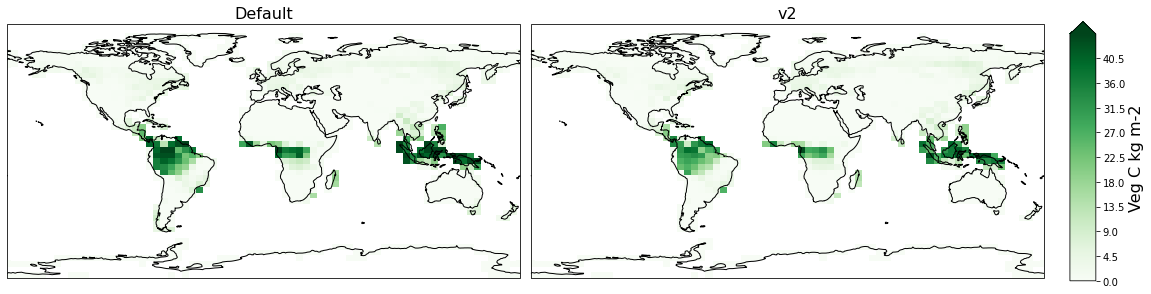

In [5]:
clevs=np.arange(0,45,0.1)
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(18,6))

axs = axs.flatten()
for j in range(0,2):
    tmp = vegs[j]
    cs= tmp.plot(levels=clevs,cmap='Greens',
    ax=axs[j],add_colorbar=False)
    axs[j].coastlines()
    axs[j].set_title('')
            
axs[0].set_title('Default', fontsize=16)
axs[1].set_title('v2', fontsize=16)

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.03)
cbar_ax = fig.add_axes([0.92, 0.275, 0.02, 0.6])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='vertical')
cbar.set_label('Veg C kg m-2', fontsize=16)

### LAI 

In [6]:
lai_def = fates_def.FATES_LAI.mean(dim='time') * fates_def.FATES_FRACTION.mean(dim='time')
lai_v2 = fates_v2.FATES_LAI.mean(dim='time') * fates_v2.FATES_FRACTION.mean(dim='time')

lais = [lai_def, lai_v2]

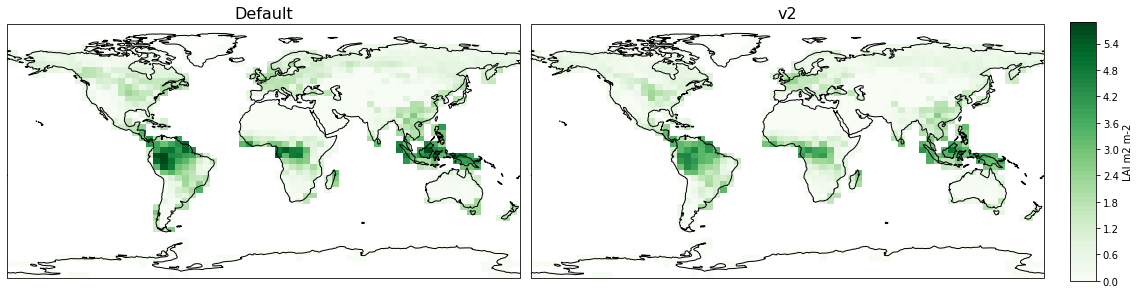

In [7]:
clevs=np.arange(0,6,0.1)
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(18,6))

axs = axs.flatten()
for j in range(0,2):
    tmp = lais[j]
    cs= tmp.plot(levels=clevs,cmap='Greens',
    ax=axs[j],add_colorbar=False)
    axs[j].coastlines()
    axs[j].set_title('')
            
axs[0].set_title('Default', fontsize=16)
axs[1].set_title('v2', fontsize=16)

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.03)
cbar_ax = fig.add_axes([0.92, 0.275, 0.02, 0.6])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='vertical')
cbar.set_label('LAI m2 m-2')

### GPP

In [8]:
gpp_def = fates_def.FATES_GPP.mean(dim='time') * fates_def.FATES_FRACTION.mean(dim='time') * 86400 * 365
gpp_v2 = fates_v2.FATES_GPP.mean(dim='time') * fates_v2.FATES_FRACTION.mean(dim='time') * 86400 * 365

gpps = [gpp_def, gpp_v2]

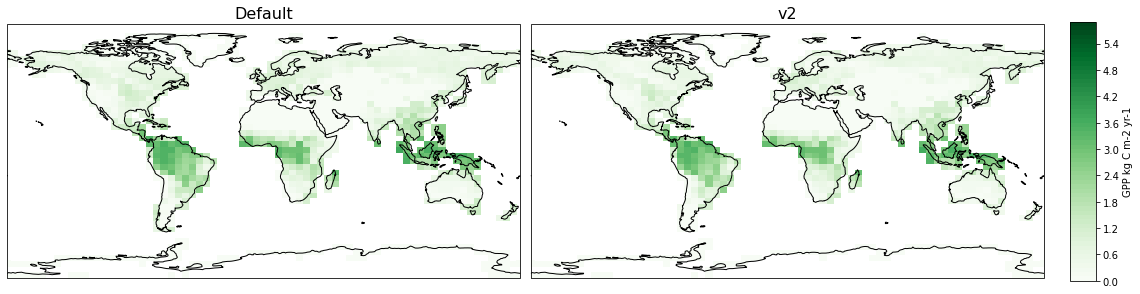

In [9]:
clevs=np.arange(0,6,0.1)
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(18,6))

axs = axs.flatten()
for j in range(0,2):
    tmp = gpps[j]
    cs= tmp.plot(levels=clevs,cmap='Greens',
    ax=axs[j],add_colorbar=False)
    axs[j].coastlines()
    axs[j].set_title('')
            
axs[0].set_title('Default', fontsize=16)
axs[1].set_title('v2', fontsize=16)

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.03)
cbar_ax = fig.add_axes([0.92, 0.275, 0.02, 0.6])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='vertical')
cbar.set_label('GPP kg C m-2 yr-1')

### NPP

In [10]:
npp_def = fates_def.FATES_NPP.mean(dim='time') * fates_def.FATES_FRACTION.mean(dim='time') * 86400 * 365
npp_v2 = fates_v2.FATES_NPP.mean(dim='time') * fates_v2.FATES_FRACTION.mean(dim='time') * 86400 * 365
npps = [npp_def, npp_v2]

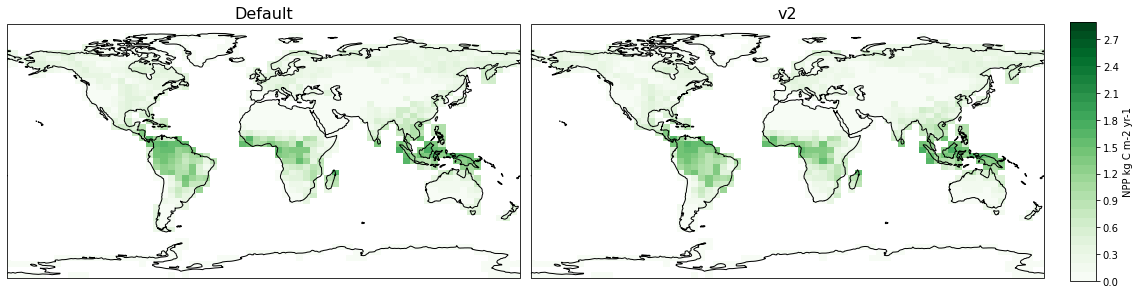

In [11]:
clevs=np.arange(0,3,0.1)
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(18,6))

axs = axs.flatten()
for j in range(0,2):
    tmp = npps[j]
    cs= tmp.plot(levels=clevs,cmap='Greens',
    ax=axs[j],add_colorbar=False)
    axs[j].coastlines()
    axs[j].set_title('')
            
axs[0].set_title('Default', fontsize=16)
axs[1].set_title('v2', fontsize=16)

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.03)
cbar_ax = fig.add_axes([0.92, 0.275, 0.02, 0.6])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='vertical')
cbar.set_label('NPP kg C m-2 yr-1')

### CUE

In [12]:
cue_def = npp_def/gpp_def
cue_v2 = npp_v2/gpp_v2
cues = [cue_def, cue_v2]

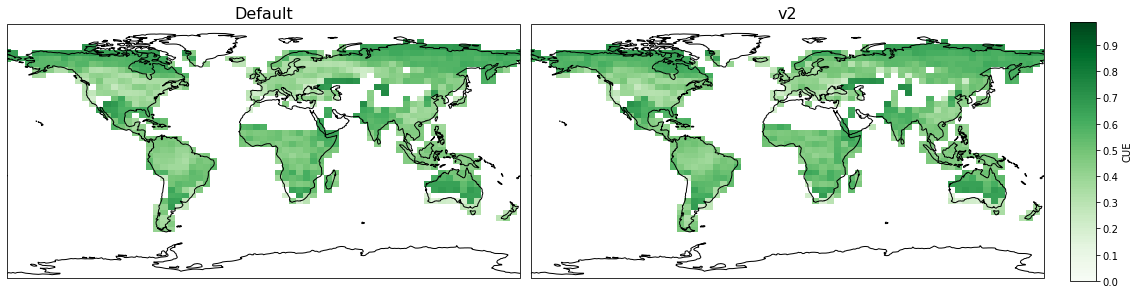

In [13]:
clevs=np.arange(0,1,0.01)
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(18,6))

axs = axs.flatten()
for j in range(0,2):
    tmp = cues[j]
    cs= tmp.plot(levels=clevs,cmap='Greens',
    ax=axs[j],add_colorbar=False)
    axs[j].coastlines()
    axs[j].set_title('')
            
axs[0].set_title('Default', fontsize=16)
axs[1].set_title('v2', fontsize=16)

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.03)
cbar_ax = fig.add_axes([0.92, 0.275, 0.02, 0.6])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='vertical')
cbar.set_label('CUE')

### Compare to plot data

#### Load Piponiot data

In [14]:
df_pip = pd.read_csv('/global/homes/j/jneedham/plot_data/Piponiot_2022_NewPhyt_AGB_AWP_AWM_standard_size_class.csv')
df_pip.head(3)

,site,variable,size_class,total,lower_bound,upper_bound
0,Amacayacu,AGB,"[1,5)",4.667,4.577,4.756
1,Amacayacu,AGB,"[5,10)",13.352,13.066,13.625
2,Amacayacu,AGB,"[10,20)",40.574,39.664,41.437


In [15]:
df_pip_latlon = pd.read_csv('/global/homes/j/jneedham/plot_data/Piponiot_2022_totals.csv')
df_pip_latlon.head(3)

,Site,Lat,Lon,AGB,AGB_l,AGB_u,AWP,AWP_l,AWP_u,AWM,AWM_l,AWM_u
0,Lenda,1.315,28.65,482.0,460.0,504.0,5.19,4.94,5.49,6.72,5.21,8.33
1,Edoro,1.560,28.52,353.0,335.0,372.0,5.23,4.99,5.55,3.94,3.05,4.93
2,Pasoh,2.980,102.31,321.0,309.0,334.0,8.27,8.04,8.53,9.58,8.46,10.90


In [16]:
pip_lats = df_pip_latlon.Lat
pip_lons = df_pip_latlon.Lon
# convert to 0 to 360
def convert_longitude(lon):
    return (lon + 360) % 360

pip_lons  = [convert_longitude(lon) for  lon in pip_lons]
pip_names = df_pip_latlon.Site
n_plots = len(pip_lats)

In [17]:
data_mids = [3, 7.5, 15, 25, 35, 45, 75, 150, 350]
data_widths = [4, 5, 10, 10, 10, 10, 50, 100, 300]
data_agb =  df_pip[df_pip['variable'] == 'AGB']
print(data_agb.head(3))

        site variable size_class   total  lower_bound  upper_bound
0  Amacayacu      AGB      [1,5)   4.667        4.577        4.756
1  Amacayacu      AGB     [5,10)  13.352       13.066       13.625
2  Amacayacu      AGB    [10,20)  40.574       39.664       41.437


In [18]:
cohort_size_bins_ex  = np.append(cohort_size_bins[1:],500)
fates_mids = (cohort_size_bins_ex[0:-1] + cohort_size_bins_ex[1:])/2
print(fates_mids)
fates_widths = cohort_size_bins_ex[1:] - cohort_size_bins_ex[0:-1]
print(fates_widths)

[  3.    7.5  15.   25.   35.   45.   75.  150.  350. ]
[  4.   5.  10.  10.  10.  10.  50. 100. 300.]


#### AGB

In [19]:
fates_def_agb = fa.scpf_to_scls_by_pft(fates_def.FATES_VEGC_ABOVEGROUND_SZPF, fates_def)  # untangle size and pft dimensions
fates_def_agb = fates_def_agb.sum(dim='fates_levpft') # sum over pfts
fates_def_agb = fates_def_agb.mean(dim='time') * 10  # mean over time and convert kg m-2 to Megagrams ha-1
fates_def_agb = fates_def_agb.isel(fates_levscls=slice(1,None))

fates_v2_agb = fa.scpf_to_scls_by_pft(fates_v2.FATES_VEGC_ABOVEGROUND_SZPF, fates_v2)  # untangle size and pft dimensions
fates_v2_agb = fates_v2_agb.sum(dim='fates_levpft') # sum over pfts
fates_v2_agb = fates_v2_agb.mean(dim='time') * 10  # mean over time and convert kg m-2 to Megagrams ha-1
fates_v2_agb = fates_v2_agb.isel(fates_levscls=slice(1,None))



In [20]:
agbs_def = []
agbs_v2 = []

# extract grid cells
for i in range(0,n_plots) : 
    agbs_def.append(fates_def_agb.sel(lat=pip_lats[i], lon=pip_lons[i], method='nearest'))
    agbs_v2.append(fates_v2_agb.sel(lat=pip_lats[i], lon=pip_lons[i], method='nearest'))
    

Text(0.5, 0.01, 'DBH (cm)')

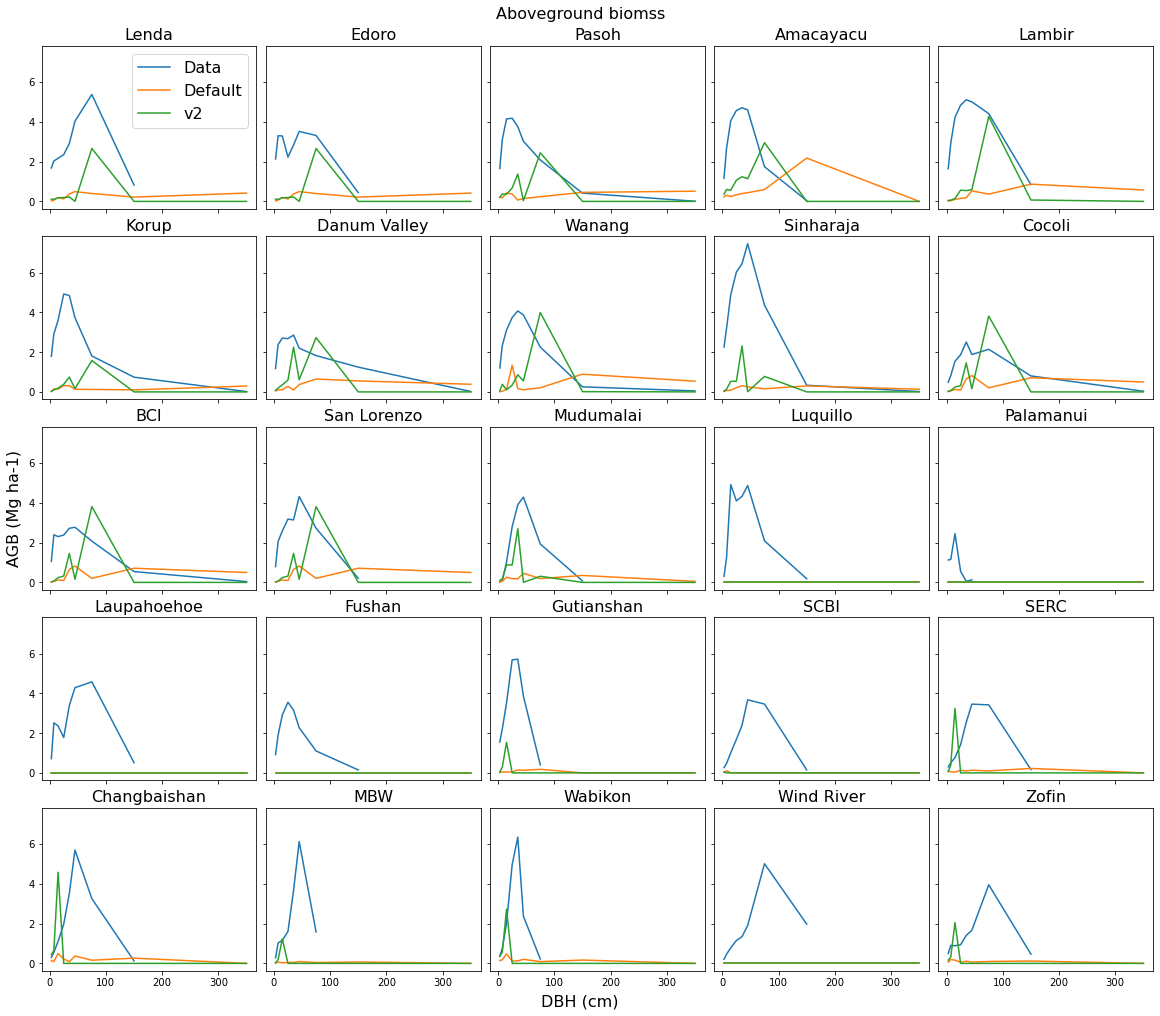

In [21]:
fig, axs = plt.subplots(nrows=5,ncols=5,
                        figsize=(16,14),sharex=True, sharey=True, constrained_layout=True)
axs=axs.flatten()

for i in range(0,n_plots):
    
        name = pip_names[i]
        plot_agb = data_agb[data_agb['site'] == name].total
        plot_mids = data_mids[0:len(plot_agb)]
        plot_widths = data_widths[0:len(plot_agb)]
        
        axs[i].plot(plot_mids, plot_agb/plot_widths, label = 'Data')
        axs[i].plot(fates_mids, agbs_def[i]/fates_widths, label = 'Default')
        axs[i].plot(fates_mids, agbs_v2[i]/fates_widths, label = 'v2')
        
        axs[i].set_title(name, fontsize=16)
        
        if i == 0 : 
            axs[i].legend(fontsize=16)

fig.suptitle('Aboveground biomss', fontsize=16)
fig.supylabel('AGB (Mg ha-1)', fontsize=16)
fig.supxlabel('DBH (cm)', fontsize=16)

### AWP

In [22]:
fates_def_awp = fa.scpf_to_scls_by_pft(fates_def.FATES_ABOVEGROUND_PROD_SZPF, fates_def)  # untangle size and pft dimensions
fates_def_awp = fates_def_awp.sum(dim='fates_levpft') # sum over pfts
fates_def_awp = fates_def_awp.mean(dim='time') * 10 * 365 * 86400 # mean over time and convert kg m-2 to Megagrams ha-1
fates_def_awp = fates_def_awp.isel(fates_levscls=slice(1,None))

fates_v2_awp = fa.scpf_to_scls_by_pft(fates_v2.FATES_ABOVEGROUND_PROD_SZPF, fates_v2)  # untangle size and pft dimensions
fates_v2_awp = fates_v2_awp.sum(dim='fates_levpft') # sum over pfts
fates_v2_awp = fates_v2_awp.mean(dim='time') * 10 * 365 * 86400 # mean over time and convert kg m-2 to Megagrams ha-1
fates_v2_awp = fates_v2_awp.isel(fates_levscls=slice(1,None))



In [23]:
data_awp =  df_pip[df_pip['variable'] == 'AWP']

In [24]:
awps_def = []
awps_v2 = []

# extract grid cells
for i in range(0,n_plots) : 
    awps_def.append(fates_def_awp.sel(lat=pip_lats[i], lon=pip_lons[i], method='nearest'))
    awps_v2.append(fates_v2_awp.sel(lat=pip_lats[i], lon=pip_lons[i], method='nearest'))
    

Text(0.5, 0.01, 'DBH (cm)')

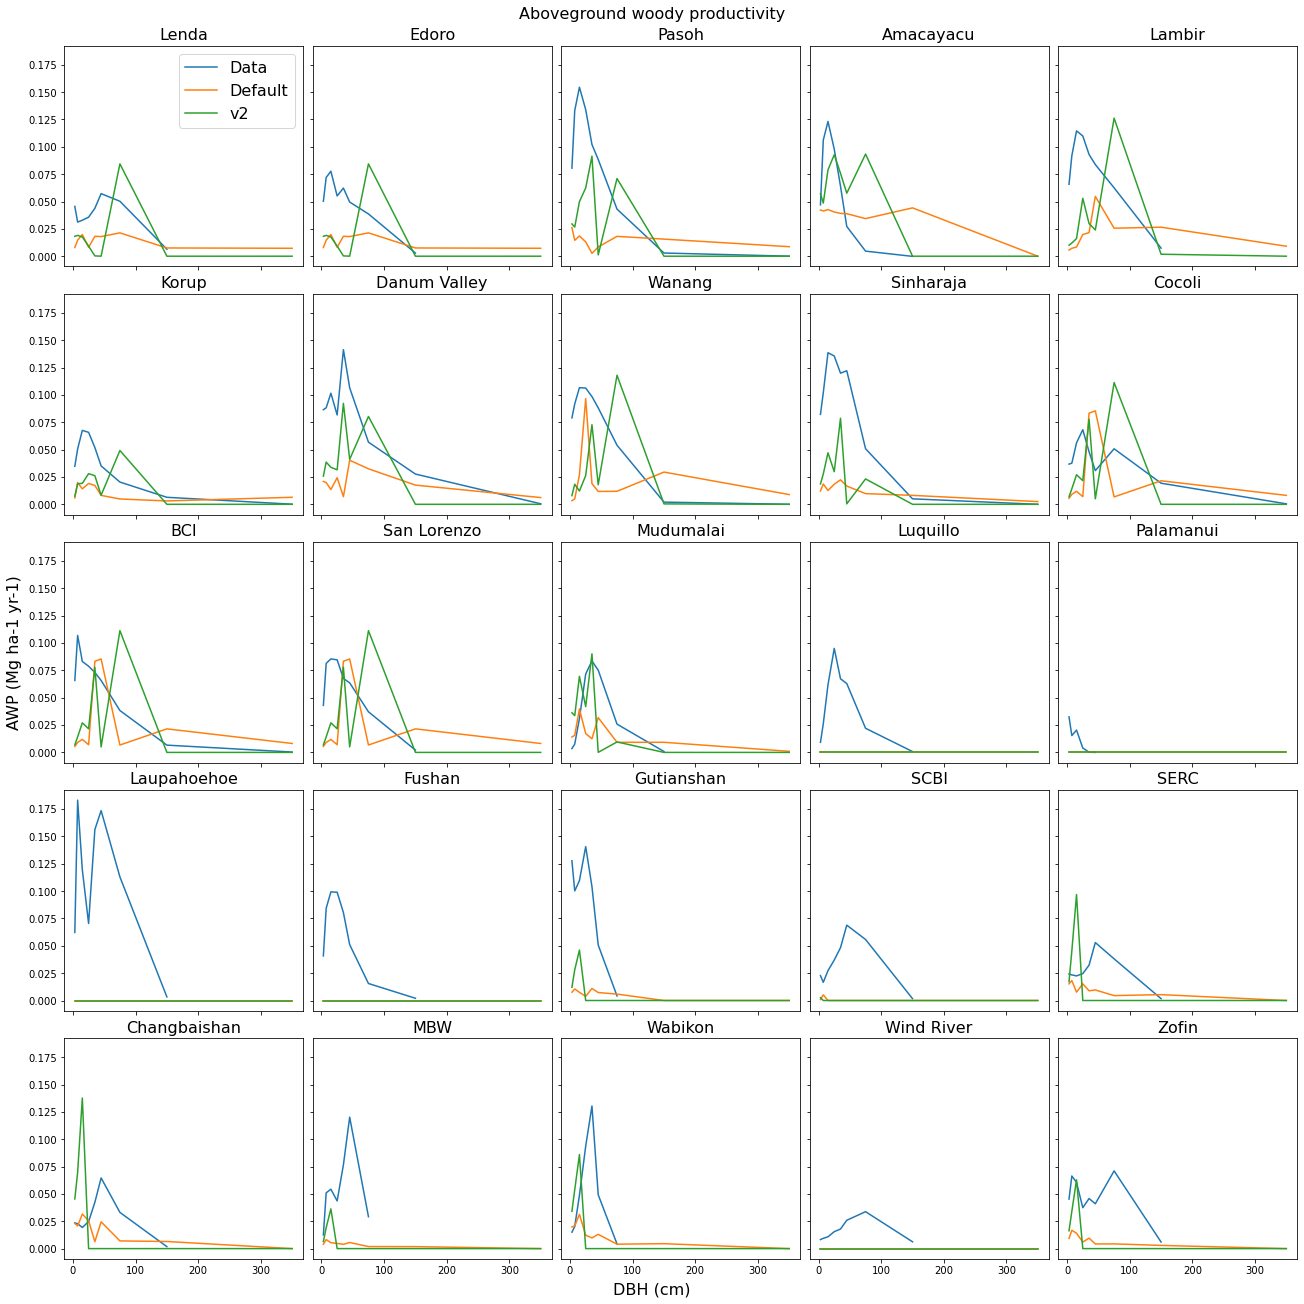

In [25]:
fig, axs = plt.subplots(nrows=5,ncols=5,
                        figsize=(18,18),sharex=True, sharey=True, constrained_layout=True)
axs=axs.flatten()

for i in range(0,n_plots):
    
        name = pip_names[i]
        plot_awp = data_awp[data_awp['site'] == name].total
        plot_mids = data_mids[0:len(plot_awp)]
        plot_widths = data_widths[0:len(plot_awp)]
        
        axs[i].plot(plot_mids, plot_awp/plot_widths, label = 'Data')
        axs[i].plot(fates_mids, awps_def[i]/fates_widths, label = 'Default')
        axs[i].plot(fates_mids, awps_v2[i]/fates_widths, label = 'v2')
        
        axs[i].set_title(name, fontsize=16)
        
        if i == 0 : 
            axs[i].legend(fontsize=16)

fig.suptitle('Aboveground woody productivity', fontsize=16)
fig.supylabel('AWP (Mg ha-1 yr-1)', fontsize=16)
fig.supxlabel('DBH (cm)', fontsize=16)

#### AWM

In [26]:
fates_def_awm = fa.scpf_to_scls_by_pft(fates_def.FATES_ABOVEGROUND_MORT_SZPF, fates_def)  # untangle size and pft dimensions
fates_def_awm = fates_def_awm.sum(dim='fates_levpft') # sum over pfts
fates_def_awm = fates_def_awm.mean(dim='time') * 10 * 365 * 86400 # mean over time and convert kg m-2 to Megagrams ha-1
fates_def_awm = fates_def_awm.isel(fates_levscls=slice(1,None))

fates_v2_awm = fa.scpf_to_scls_by_pft(fates_v2.FATES_ABOVEGROUND_MORT_SZPF, fates_v2)  # untangle size and pft dimensions
fates_v2_awm = fates_v2_awm.sum(dim='fates_levpft') # sum over pfts
fates_v2_awm = fates_v2_awm.mean(dim='time') * 10 * 365 * 86400 # mean over time and convert kg m-2 to Megagrams ha-1
fates_v2_awm = fates_v2_awm.isel(fates_levscls=slice(1,None))



In [27]:
data_awm =  df_pip[df_pip['variable'] == 'AWM']

In [28]:
awms_def = []
awms_v2 = []

# extract grid cells
for i in range(0,n_plots) : 
    awms_def.append(fates_def_awm.sel(lat=pip_lats[i], lon=pip_lons[i], method='nearest'))
    awms_v2.append(fates_v2_awm.sel(lat=pip_lats[i], lon=pip_lons[i], method='nearest'))
    

''

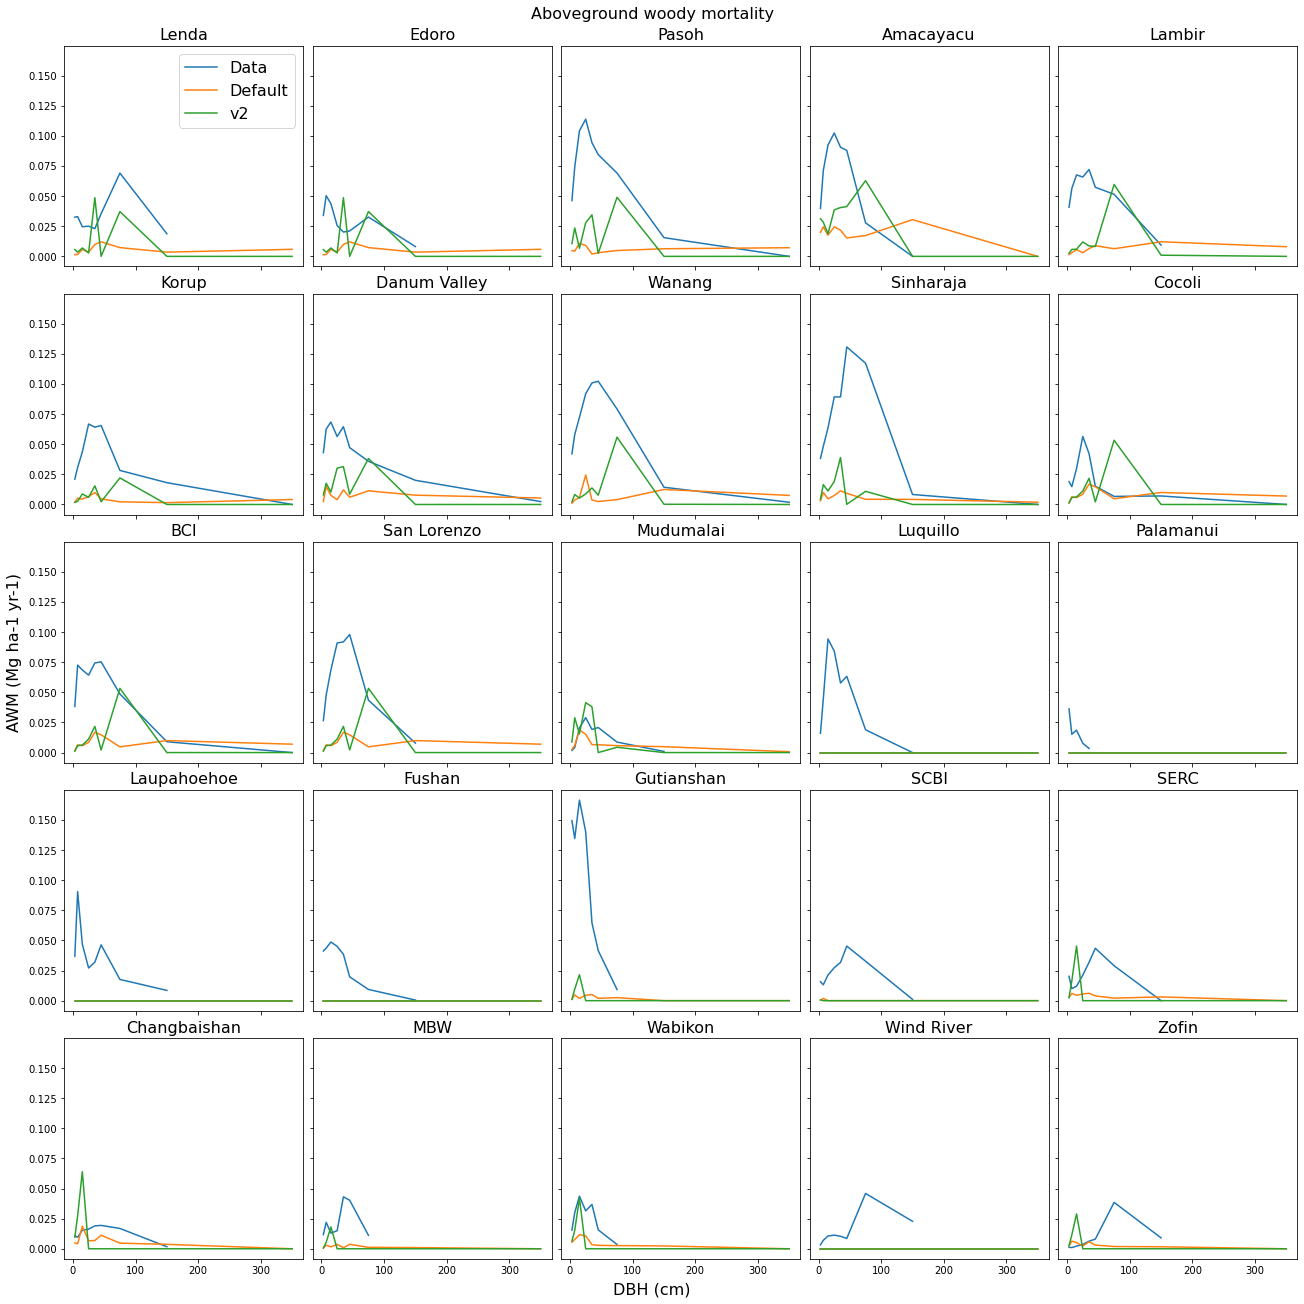

In [29]:
fig, axs = plt.subplots(nrows=5,ncols=5,
                        figsize=(18,18),sharex=True, sharey=True, constrained_layout=True)
axs=axs.flatten()

for i in range(0,n_plots):
    
        name = pip_names[i]
        plot_awm = data_awm[data_awm['site'] == name].total
        plot_mids = data_mids[0:len(plot_awm)]
        plot_widths = data_widths[0:len(plot_awm)]
        
        axs[i].plot(plot_mids, plot_awm/plot_widths, label = 'Data')
        axs[i].plot(fates_mids, awms_def[i]/fates_widths, label = 'Default')
        axs[i].plot(fates_mids, awms_v2[i]/fates_widths, label = 'v2')
        
        axs[i].set_title(name, fontsize=16)
        
        if i == 0 : 
            axs[i].legend(fontsize=16)

fig.suptitle('Aboveground woody mortality', fontsize=16)
fig.supylabel('AWM (Mg ha-1 yr-1)', fontsize=16)
fig.supxlabel('DBH (cm)', fontsize=16)
;